In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# tips 데이터셋 로드
tips = sns.load_dataset("tips")
tips

1. 컬럼 이름 변경 ; [총금액,팁,성별,흡연여부,요일,시간,인원]
2. 총금액,팁 컬럼의 데이터를 소수점 1자리 두고 반올림
3. 인원과 성별에 따른(그룹화) 팁의 비율의 평균값을 구하고 그래프 시각화(바그래프)

In [ ]:
tips.columns = ["총금액","팁","성별","흡연여부","요일","시간","인원"]

In [ ]:
tips["총금액"] = tips["총금액"].round(1)
tips["팁"] = tips["팁"].round(1)

# tips["총금액","팁"] = tips["총금액","팁"].round(1)

In [ ]:
tips["팁비율"] = (tips["팁"] / tips["총금액"]) * 100

In [ ]:
# # 팁 비율의 평균값과 인원과 성별을 그룹화하여 모든 컬럼에 대한 평균을 낸 값의 평균과는 당연히 다를수밖에
# res = (tips.groupby(["인원","성별"]).mean()["팁"] / tips.groupby(["인원","성별"]).mean()["총금액"]) * 100
# res_df = pd.DataFrame(res,columns=["팁비율"])
# res_df
# res_df.plot.bar()

In [ ]:
group_data = tips[["인원","성별","팁비율"]].groupby(["인원","성별"]).mean()

In [ ]:
group_data.head(2)

In [ ]:
group_data.plot.bar()
# plt.rc('font', family="Malgun Gothic")

In [ ]:
x = list(range(0,len(group_data.index)))
y = group_data["팁비율"]
plt.barh(x,y)
plt.yticks(x,group_data.index)
plt.legend("팁")
plt.show()

In [116]:
# group_data에서 남자 데이터/여자 데이터 분리

male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in group_data.index:
    if i[1]=="Male":
        # male_data.append()
        male_data = pd.concat([male_data,group_data.loc[[i]]])
    else:
        female_data = pd.concat([male_data,group_data.loc[[i]]])

In [106]:
# loc함수 사용 시 인덱스값 단일 지정 -> Series 형태 반환
type(group_data.loc[(1,"Male")])

pandas.core.series.Series

In [107]:
# loc함수 사용 시 인덱스값 단일 지정하더라도 리스트 형태로 지정 -> DataFrame 형태 반환
type(group_data.loc[[(1,"Male")]])

pandas.core.frame.DataFrame

In [109]:
group_data.loc[[(1,"Male")]]

,,팁비율
인원,성별,
1,Male,22.093023


In [108]:
group_data.index[0]

(1, 'Male')

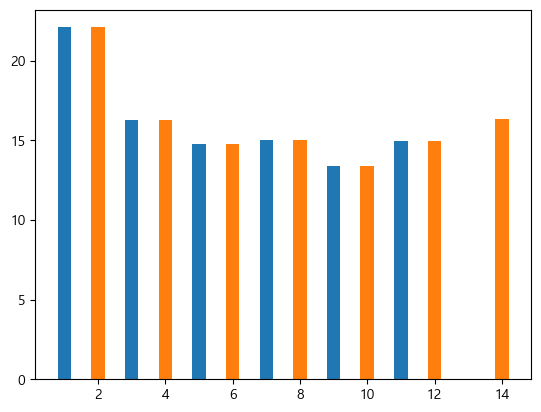

In [141]:
# male_x = [i for i in range(1,13,2)]
male_x = list(range(1,len(male_data)*2+1, 2))
male_y = male_data["팁비율"]

female_x = list(range(2,(len(female_data)+1)*2, 2))
female_y = female_data["팁비율"]

plt.bar(male_x,male_y, width=0.4)
plt.bar(female_x,female_y, width=0.4)

plt.show()

### pivot table
1. 그룹화
2. 인덱스,컬럼을 기준으로 
3. 데이터 집계

In [125]:
pivot_data = pd.pivot_table(
    tips,
    index="인원",
    columns="성별",
    values=["팁비율"],  # 데이터프레임을 채울 value값의 정보인 column값을 표시하고 싶을 때는 ["팁비율"] 
    aggfunc="mean"
)

<AxesSubplot:xlabel='인원'>

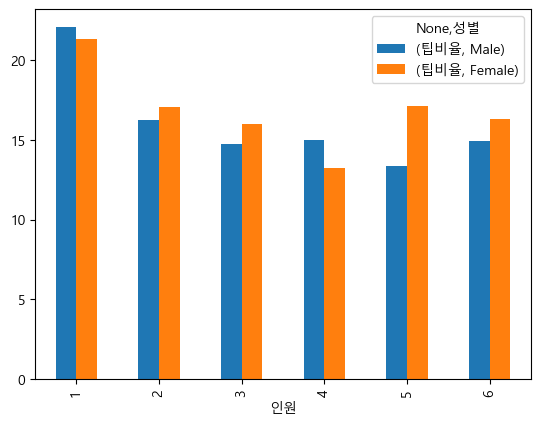

In [126]:
pivot_data.plot.bar()